# Stock Market Prediction

## Installing Libraries

In [95]:
!pip install numpy

In [68]:
!pip install pandas


In [69]:
!pip install seaborn

In [70]:
!pip install matplotlib

## Import Libraries And Load Dataset



In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [94]:
df = pd.read_csv('infolimpioavanzadoTarget.csv')

## Data Wrangling/Preprocessing

###  Data Exploration and Cleaning:
Began by exploring the dataset to understand its structure, features, and potential insights.

Utilized Pandas for data manipulation and exploration. Identified and missing values,


In [73]:
# Display information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7781 entries, 0 to 7780
Columns: 1285 entries, date to TARGET
dtypes: float64(1280), int64(3), object(2)
memory usage: 76.3+ MB
None


In [74]:
print(df.shape)

(7781, 1285)


In [75]:
# Display the first few rows of the dataset
print(df.head())

         date       open       high        low      close   adjclose  volume  \
0  2022-01-03  17.799999  18.219000  17.500000  17.760000  17.760000  106600   
1  2022-01-04  17.700001  18.309999  17.620001  17.660000  17.660000  128700   
2  2022-01-05  17.580000  17.799999  16.910000  16.950001  16.950001  103100   
3  2022-01-06  16.650000  16.879999  16.139999  16.170000  16.170000  173600   
4  2022-01-07  16.219999  16.290001  15.630000  15.710000  15.710000  137800   

  ticker  RSIadjclose15  RSIvolume15  ...  high-15  K-15  D-15  \
0   ASLE            NaN          NaN  ...      NaN   NaN   NaN   
1   ASLE            NaN          NaN  ...      NaN   NaN   NaN   
2   ASLE            NaN          NaN  ...      NaN   NaN   NaN   
3   ASLE            NaN          NaN  ...      NaN   NaN   NaN   
4   ASLE            NaN          NaN  ...      NaN   NaN   NaN   

   stochastic-k-15  stochastic-d-15  stochastic-kd-15  volumenrelativo  \
0              NaN              NaN             

In [76]:
# Display summary statistics of the dataset
print(df.describe())

              open         high          low        close     adjclose  \
count  7781.000000  7781.000000  7781.000000  7781.000000  7781.000000   
mean     34.990220    35.655999    34.301243    34.964414    34.483147   
std      99.841502   101.451058    98.073945    99.790823    98.603879   
min       0.410000     0.435000     0.405000     0.408000     0.408000   
25%       4.050000     4.130000     3.980000     4.030000     3.960000   
50%      10.080000    10.110000    10.005000    10.080000    10.061000   
75%      24.350000    24.500000    24.080000    24.250000    22.466007   
max     795.739990   799.359985   784.960022   797.489990   783.376221   

             volume  RSIadjclose15  RSIvolume15  RSIadjclose25  RSIvolume25  \
count  7.781000e+03    7316.000000  7316.000000    7006.000000  7006.000000   
mean   7.586022e+05      46.817434    49.814790      46.966016    49.898659   
std    3.934491e+06      11.672838     5.002664       8.760961     3.420371   
min    0.000000e+

In [77]:
# Check for missing values
print(df.isnull().sum())

date                  0
open                  0
high                  0
low                   0
close                 0
                   ... 
stochastic-kd-15    587
volumenrelativo     215
diff                155
INCREMENTO          155
TARGET                0
Length: 1285, dtype: int64


In [78]:
#removing duplicates
df = df.drop_duplicates()

In [79]:
# converting date into a datetime data and checking its type
df['date'] = pd.to_datetime(df['date'])

print(df['date'].dtype)



datetime64[ns]


## Visualize key statistics and trends 

*Visualized key statistics, including open, high, low, and close prices, as well as trading volume trends.

*Utilized Seaborn for enhanced visualizations, providing a clearer understanding of market trends.

*Created line plots to showcase variations in stock prices over time.

*Employed bar plots to display trading volume dynamics.

### Line plot for closing prices

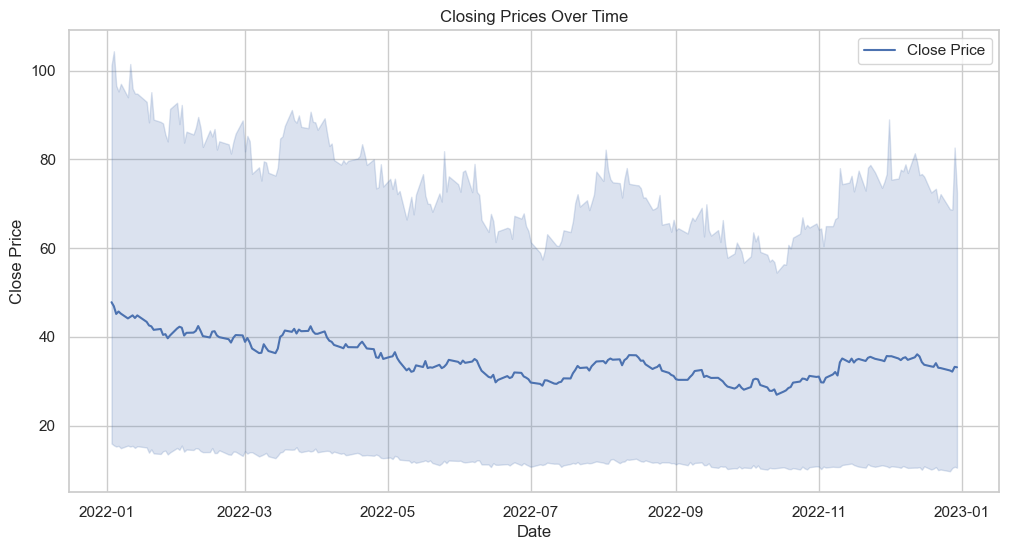

In [80]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='close', data=df, label='Close Price')
plt.title('Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()


### Price and Volume related Columns Visualization
Line plot showing trends in both open and close prices over time and illustrating variations in high and low prices.

Line plot depicting the trend of trading volume over time and  illustrating variations in relative volume.

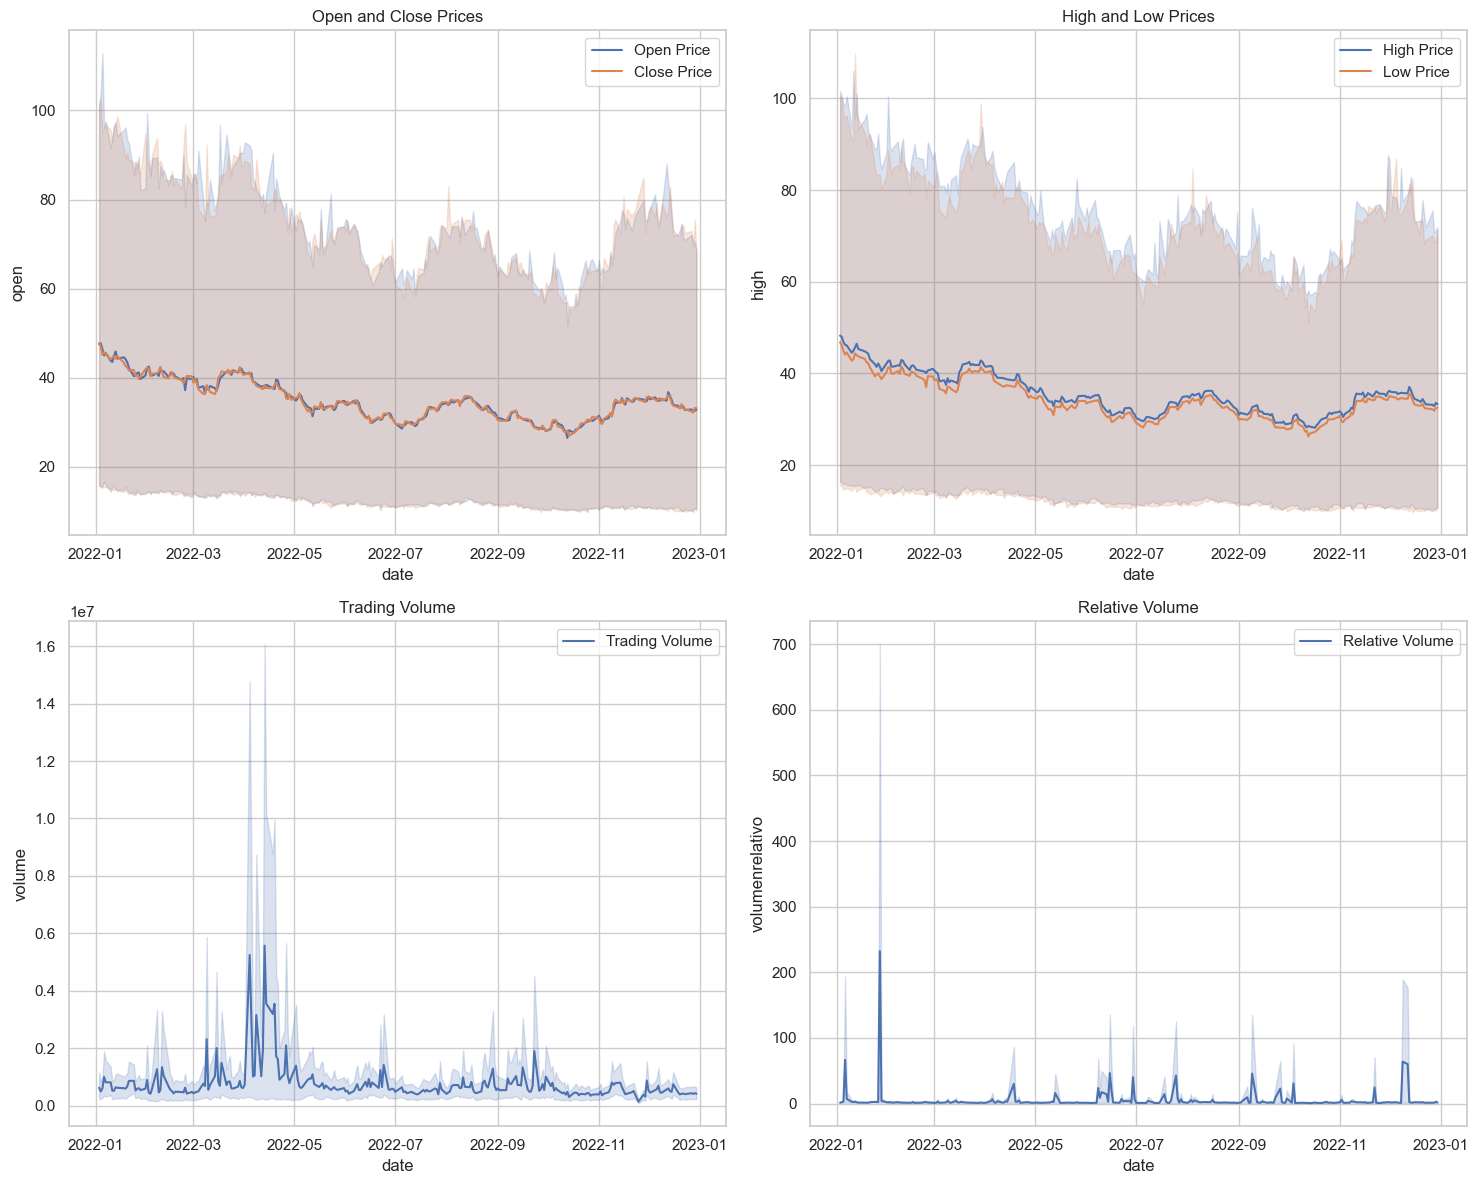

In [81]:
# Set the style of seaborn for better aesthetics
sns.set(style="whitegrid")

# Plotting key statistics
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))

# Price-related columns
sns.lineplot(x='date', y='open', data=df, ax=axes[0, 0], label='Open Price')
sns.lineplot(x='date', y='close', data=df, ax=axes[0, 0], label='Close Price')
axes[0, 0].set_title('Open and Close Prices')

sns.lineplot(x='date', y='high', data=df, ax=axes[0, 1], label='High Price')
sns.lineplot(x='date', y='low', data=df, ax=axes[0, 1], label='Low Price')
axes[0, 1].set_title('High and Low Prices')

# Volume-related columns
sns.lineplot(x='date', y='volume', data=df, ax=axes[1, 0], label='Trading Volume')
axes[1, 0].set_title('Trading Volume')

sns.lineplot(x='date', y='volumenrelativo', data=df, ax=axes[1, 1], label='Relative Volume')
axes[1, 1].set_title('Relative Volume')

# Adjust layout
plt.tight_layout()
plt.show()

### Correlation Matrix Heatmap:
Displaying the correlation coefficients between open, high, low, close, adjusted close prices, and trading volume.

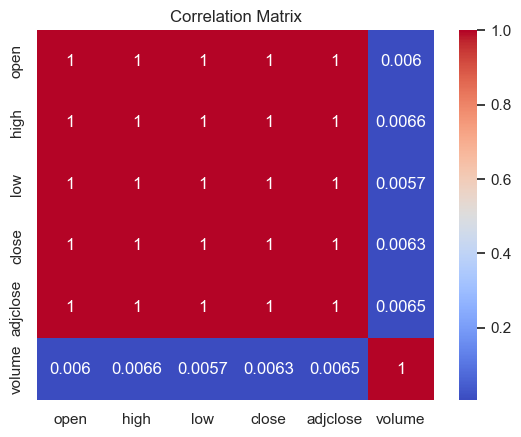

In [82]:
correlation_matrix = df[['open', 'high', 'low', 'close', 'adjclose', 'volume']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()


### Pairplot of Numerical Variables
Visualization of pairwise relationships among open, high, low, close, adjusted close prices, and trading volume.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


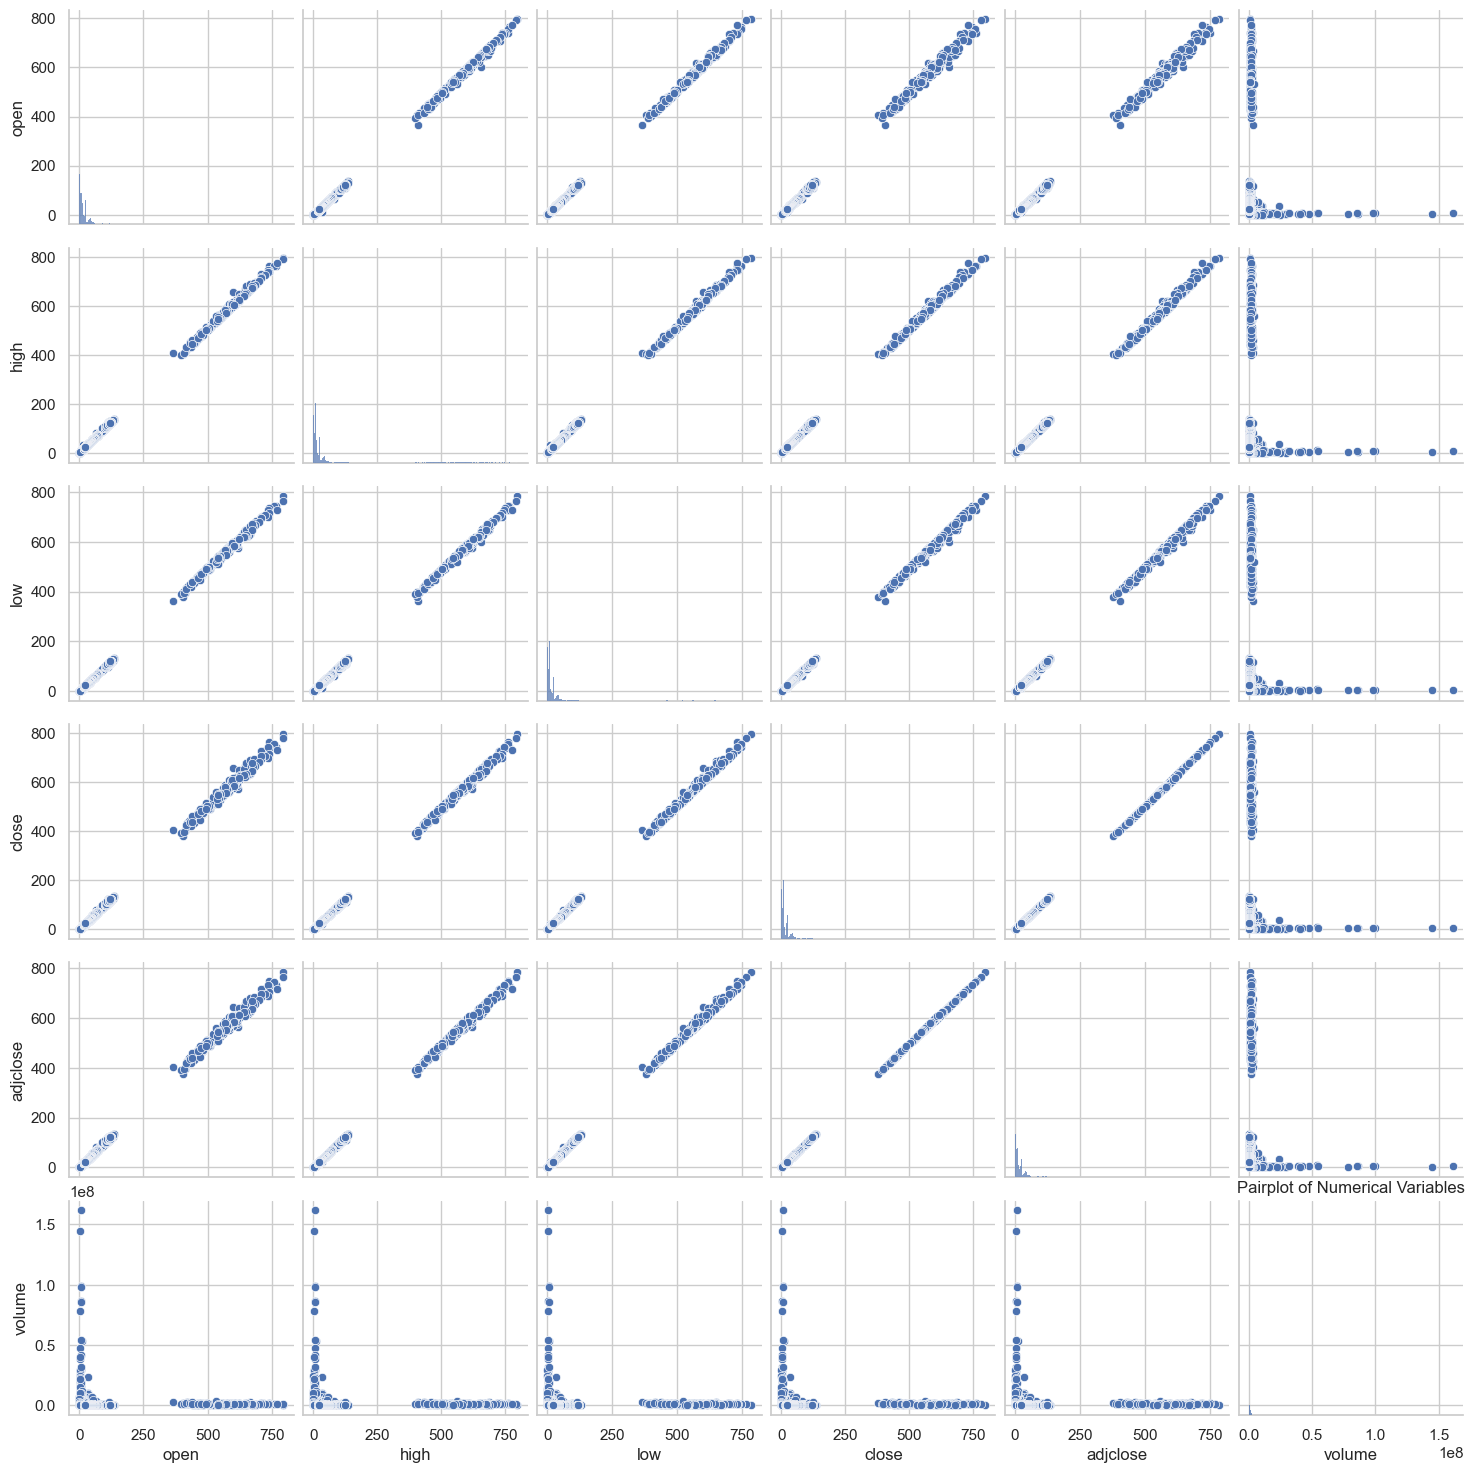

In [83]:
sns.pairplot(df[['open', 'high', 'low', 'close', 'adjclose', 'volume']])
plt.title('Pairplot of Numerical Variables')
plt.show()

#### RSI Variations Over Time
Column Selection:
Identifying columns related to RSI from the DataFrame to visualize the variations.

Line Plots for Each RSI:
Creating subplots for each RSI-related column, showcasing the trend of RSI values over time.

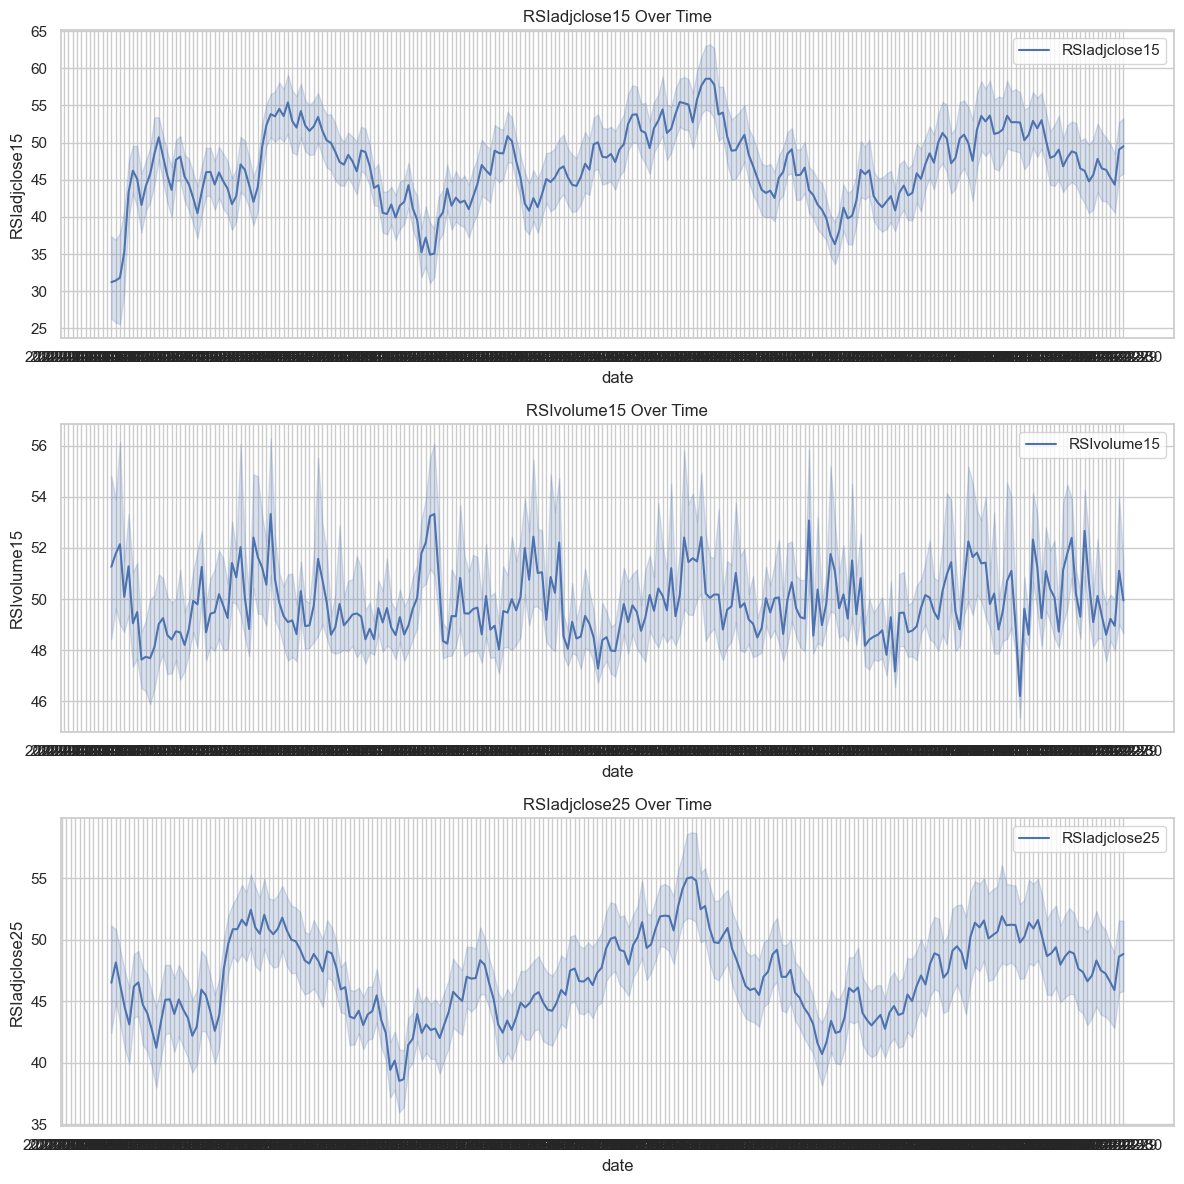

In [97]:
# Get all columns related to RSI
rsi_columns = [col for col in df.columns if 'RSI' in col][:3]

# Plotting RSI variations
fig, axes = plt.subplots(nrows=len(rsi_columns), ncols=1, figsize=(12, 4 * len(rsi_columns)))

for i, column in enumerate(rsi_columns):
    sns.lineplot(x='date', y=column, data=df, ax=axes[i], label=column)
    axes[i].set_title(f'{column} Over Time')

# Adjust layout
plt.tight_layout()
plt.show()

#### MACD Variations Over Time:
Column Selection:
Identifying columns related to MACD from the DataFrame to visualize the variations.

Line Plots for Each MACD:
Creating subplots for each MACD-related column, illustrating the trend of MACD values over time.

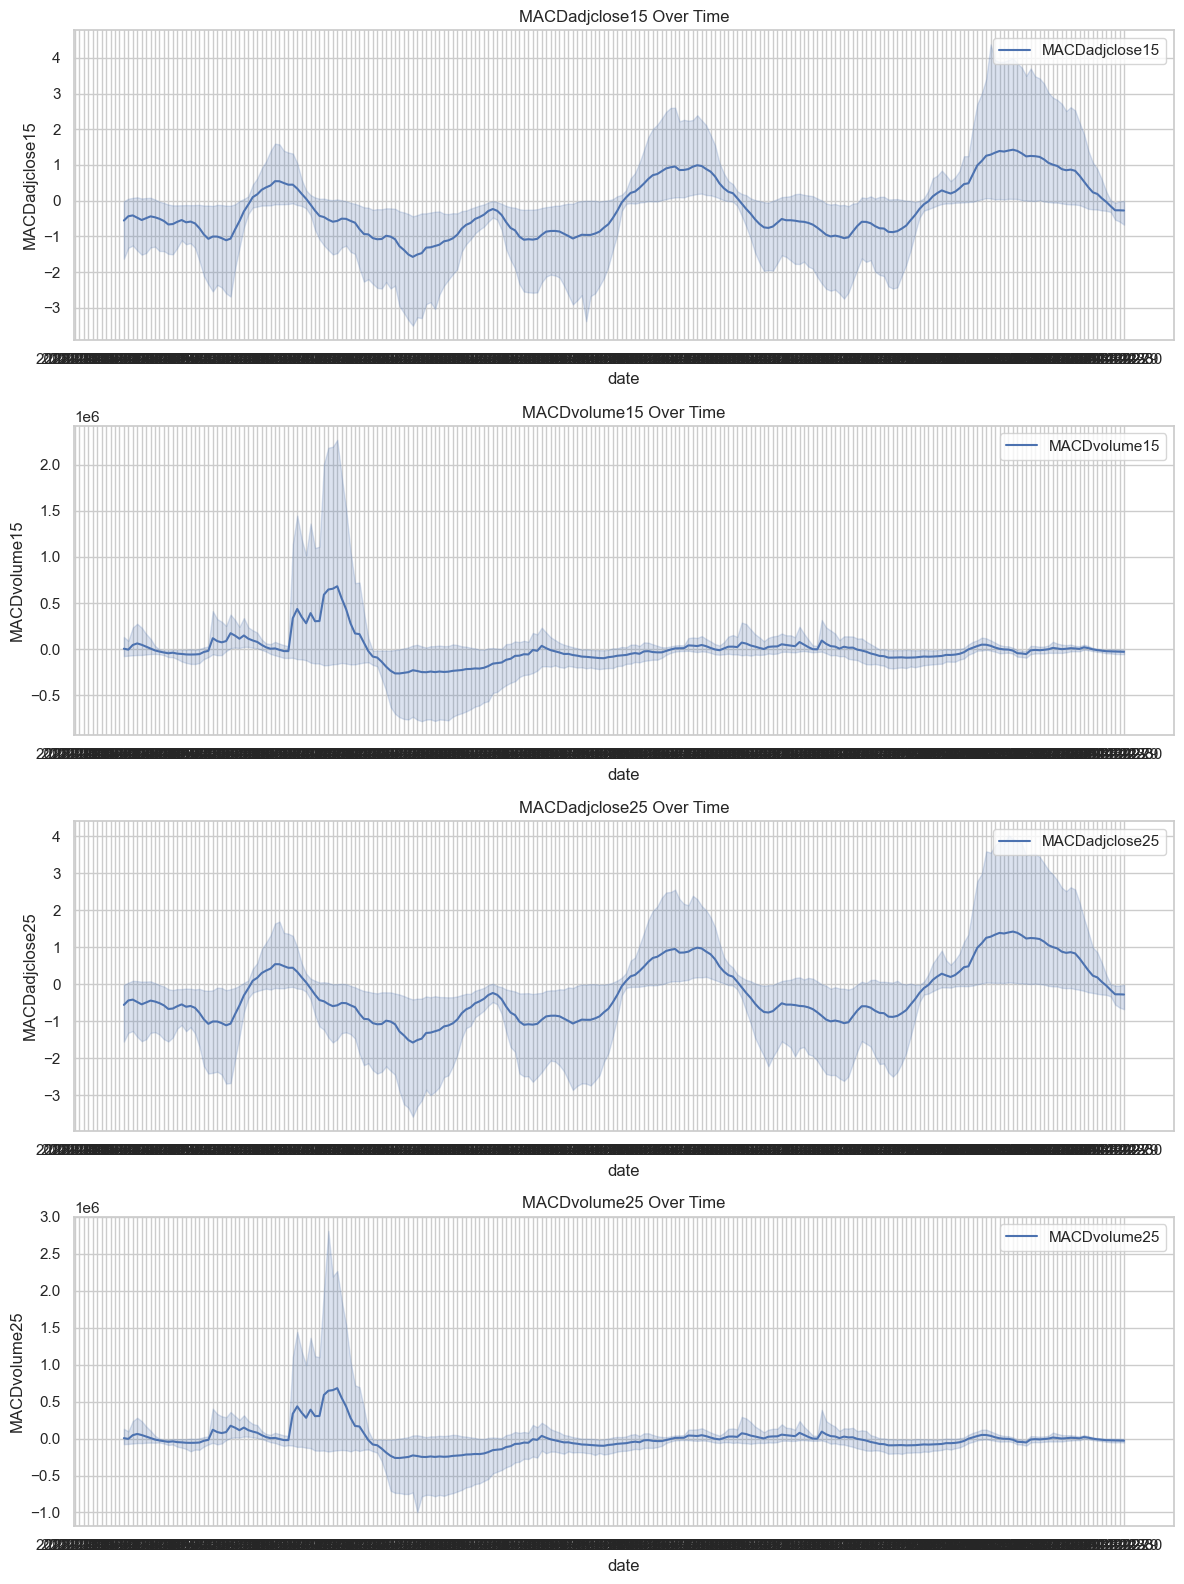

In [96]:
# Get all columns related to MACD
macd_columns = [col for col in df.columns if 'MACD' in col][:4]

# Plotting MACD variations
fig, axes = plt.subplots(nrows=len(macd_columns), ncols=1, figsize=(12, 4 * len(macd_columns)))

for i, column in enumerate(macd_columns):
    sns.lineplot(x='date', y=column, data=df, ax=axes[i], label=column)
    axes[i].set_title(f'{column} Over Time')

# Adjust layout
plt.tight_layout()
plt.show()


### Trading Volume Over Time:

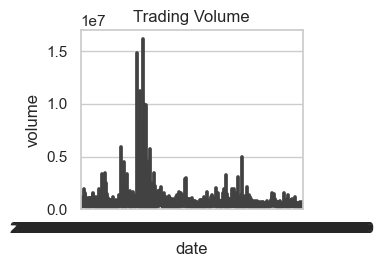

In [86]:
# Plotting trading volume
plt.subplot(2, 2, 2)
sns.barplot(x='date', y='volume', data=df, label='Trading Volume', color='green')
plt.title('Trading Volume')

plt.tight_layout()
plt.show()


## Building and Evaluating a Linear Regression Model

Applied linear regression to model the relationship between various features and closing prices.
Evaluated the model's performance using metrics such as Mean Squared Error (MSE) and R-squared.

Split the dataset into training and testing sets.
Trained a Linear Regression model using relevant features and evaluated its predictive performance.


#### Handling Missing Values
Dropping rows with missing values to ensure a clean dataset for modeling.

In [87]:
#Handling Missing Values:
df_cleaned = df.dropna()


#### Feature Selection and Target Variable  And  Splitting Data for Training and Testing
Feature Set:
Selecting relevant features ('open', 'high', 'low', 'close', 'volume') as input variables (X).

Target Variable:
Choosing 'close' as the target variable (y).


In [88]:
X = df_cleaned[['open', 'high', 'low', 'close', 'volume']]  # Add all relevant features
y = df_cleaned['close']  # Assuming 'close' is the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



### Linear Regression Modeling
Initializing a Linear Regression model and training it on the training set.

#### Choice of Predictive Model
1. **Linear Relationship:**
   - Linear Regression is well-suited when there is a linear relationship between the input features and the target variable. In the context of stock prices, linear relationships are commonly observed in certain market conditions.
2. **Interpretability:**
   - Linear Regression models provide clear interpretability. It allows us to understand the impact of each feature on the predicted target, contributing to a more transparent analysis.
3. **Simplicity:**
   - Linear Regression is a simple and computationally efficient model. This simplicity makes it a good starting point, especially when exploring and understanding the dataset.

#### Features Considered

The features considered for predicting stock prices include:
- **Open Price:** The opening price of a stock.
- **High Price:** The highest price during a trading day.
- **Low Price:** The lowest price during a trading day.
- **Volume:** The total number of shares traded.
- **Close Price:** The closing price of a stock, which is often the target variable.

These features were chosen based on their relevance in financial analysis and their potential impact on stock prices.

#### Model Performance Assessment

The performance of the Linear Regression model was evaluated using standard regression metrics:
- **Mean Squared Error (MSE):** A measure of the average squared difference between predicted and actual values.
- **R-squared Score (R2):** A measure of the proportion of variance in the dependent variable explained by the independent variables.



In [89]:

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

####  Model Evaluation
Making predictions on the test set using the trained model.

In [90]:
y_pred = model.predict(X_test)


#### Model Performance Metrics
Calculating Mean Squared Error (MSE) and R-squared score for model evaluation.

In [91]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared Score: {r2}')


Mean Squared Error: 1.4984649462332086e-24
R-squared Score: 1.0


#### Visualizing Model Performance
Creating a scatter plot to visually compare the actual and predicted stock prices.

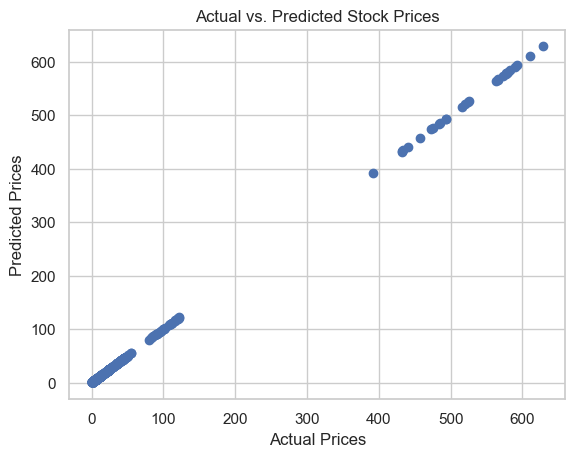

In [92]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Stock Prices')
plt.show()

#### Displaying Predicted Future Prices
Utilized the trained Linear Regression model to predict future stock prices based on the last 5 days' features.

Selected relevant features from the most recent data.
Leveraged the trained model to make predictions for the next 5 days.

In [50]:
# Predict future prices (example: next 5 days)
future_features = df_cleaned[['open', 'high', 'low', 'close', 'volume']].tail(5)
future_predictions = model.predict(future_features)

print("Predicted Future Prices:")
print(future_predictions)

Predicted Future Prices:
[22.67000008 22.60000038 22.84000015 23.30999947 23.29999924]


## Conclusion

### Key Findings:
Discovered trends and patterns in stock prices and trading volume.
Utilized technical analysis to gain insights into market conditions.
Built and evaluated a predictive model for future stock price trends.

### Limitations:
Assumes past patterns will continue into the future.
Model performance may vary in different market conditions.